In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
# Retrieve inputs
%store -r X_motion_01_3D
%store -r X_motion_015_3D
%store -r X_motion_02_3D
%store -r X_motion_025_3D
%store -r X_motion_03_3D
%store -r X_motion_035_3D
%store -r X_motion_04_3D
%store -r X_motion_045_3D
%store -r X_motion_05_3D
%store -r X_motion_055_3D
%store -r X_motion_06_3D
%store -r X_motion_065_3D
%store -r X_motion_07_3D
%store -r X_motion_075_3D
%store -r X_motion_08_3D


# Retrieve labels
%store -r Y_motion_01_3D
%store -r Y_motion_015_3D
%store -r Y_motion_02_3D
%store -r Y_motion_025_3D
%store -r Y_motion_03_3D
%store -r Y_motion_035_3D
%store -r Y_motion_04_3D
%store -r Y_motion_045_3D
%store -r Y_motion_05_3D
%store -r Y_motion_055_3D
%store -r Y_motion_06_3D
%store -r Y_motion_065_3D
%store -r Y_motion_07_3D
%store -r Y_motion_075_3D
%store -r Y_motion_08_3D

In [6]:
print(X_motion_01_3D.shape)
print(X_motion_015_3D.shape)
print(X_motion_02_3D.shape)
print(X_motion_025_3D.shape)
print(X_motion_03_3D.shape)
print(X_motion_035_3D.shape)
print(X_motion_04_3D.shape)
print(X_motion_045_3D.shape)
print(X_motion_05_3D.shape)
print(X_motion_055_3D.shape)
print(X_motion_06_3D.shape)
print(X_motion_065_3D.shape)
print(X_motion_07_3D.shape)
print(X_motion_075_3D.shape)
print(X_motion_08_3D.shape)

(1080, 18)
(1082, 18)
(1081, 18)
(1076, 18)
(1078, 18)
(1081, 18)
(1078, 18)
(1076, 18)
(1080, 18)
(1079, 18)
(1083, 18)
(1077, 18)
(1082, 18)
(1082, 18)
(1079, 18)


In [7]:
print(Y_motion_01_3D.shape)
print(Y_motion_015_3D.shape)
print(Y_motion_02_3D.shape)
print(Y_motion_025_3D.shape)
print(Y_motion_03_3D.shape)
print(Y_motion_035_3D.shape)
print(Y_motion_04_3D.shape)
print(Y_motion_045_3D.shape)
print(Y_motion_05_3D.shape)
print(Y_motion_055_3D.shape)
print(Y_motion_06_3D.shape)
print(Y_motion_065_3D.shape)
print(Y_motion_07_3D.shape)
print(Y_motion_075_3D.shape)
print(Y_motion_08_3D.shape)

(1080, 12)
(1082, 12)
(1081, 12)
(1076, 12)
(1078, 12)
(1081, 12)
(1078, 12)
(1076, 12)
(1080, 12)
(1079, 12)
(1083, 12)
(1077, 12)
(1082, 12)
(1082, 12)
(1079, 12)


In [8]:
X_motions_3D = np.concatenate((X_motion_01_3D,
                               X_motion_015_3D,
                               X_motion_02_3D,
                               X_motion_025_3D,
                               X_motion_03_3D,
                               X_motion_035_3D, 
                               X_motion_04_3D,
                               X_motion_045_3D,
                               X_motion_05_3D,
                               X_motion_055_3D,
                               X_motion_06_3D,
                               X_motion_065_3D,
                               X_motion_07_3D,
                               X_motion_075_3D,
                               X_motion_08_3D))
print(X_motions_3D.shape)

(16194, 18)


In [9]:
Y_motions_3D = np.concatenate((Y_motion_01_3D,
                               Y_motion_015_3D,
                               Y_motion_02_3D,
                               Y_motion_025_3D,
                               Y_motion_03_3D,
                               Y_motion_035_3D, 
                               Y_motion_04_3D,
                               Y_motion_045_3D,
                               Y_motion_05_3D,
                               Y_motion_055_3D,
                               Y_motion_06_3D,
                               Y_motion_065_3D,
                               Y_motion_07_3D,
                               Y_motion_075_3D,
                               Y_motion_08_3D))
print(Y_motions_3D.shape)

(16194, 12)


In [8]:
%store -r X_motion_3D
%store -r Y_motion_3D

In [9]:
X_motions_3D = X_motion_3D
Y_motions_3D = Y_motion_3D

In [10]:
print(X_motion_3D.shape)
print(Y_motion_3D.shape)

(14412, 24)
(14412, 12)


# Multivariate Linear Regression (Foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [11]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict

In [12]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

## Predict FR foot -> (x,y)

In [13]:
X_motions_3D[1, :]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.64780167e-04,  3.44497203e-03,
        8.67398936e-40,  1.10932398e-01,  1.10932398e-01,  1.10932398e-01,
        1.78000000e-01,  1.37000000e-01, -3.40000000e-01,  2.08000000e-01,
       -1.34000000e-01, -3.39000000e-01, -2.69000000e-01,  1.35000000e-01,
       -3.41000000e-01, -2.97000000e-01, -1.37000000e-01, -3.40000000e-01])

In [14]:
Y_motions_3D[1, :]

array([ 0.202,  0.132, -0.337,  0.179, -0.138, -0.342, -0.294,  0.137,
       -0.339, -0.272, -0.137, -0.345])

In [26]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions_3D[:, :6], X_motions_3D[:, 6:8], X_motions_3D[:, 9:11]))

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = Y_motions_3D[:, :2]

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Create the model
model_fl_full = LinearRegression()

# Fit the model
model_fl_full.fit(X_train, Y_train)

# Predict
predictions = model_fl_full.predict(X_test)

# MSE stats
print("Model score: ", model_fl_full.score(X_test, Y_test))
print("The lowest error is: ", np.min(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The highest error is: ", np.max(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The avg. error is: ", np.mean(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mean_squared_error(Y_test, predictions))
#print("Seq of errors (descendant): \n", sorted(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1).tolist(), reverse=True))

Model score:  0.955716371886759
The lowest error is:  6.09624063369063e-07
The highest error is:  0.0792793227507574
The avg. error is:  0.005763758596593542
The mean squared avg. error between the prediction and groundtruth is:  5.4441183594606345e-05


Text(0, 0.5, 'Predictions')

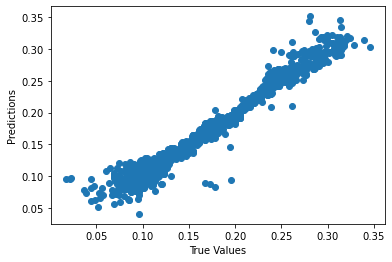

In [27]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [28]:
#idx = np.where(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1) == np.max(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))[0]

In [29]:
#print(f'Command: {X_test[idx, 0:3]}. Start: {X_test[idx, 6:8]}. Groundtruth: {Y_test[idx]}. Predicted: {predictions[idx]}')

In [30]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx, :3]}. State: {X_test[idx, 3:6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

## Predict FR foot -> x

### Simple Linear Regression

In [15]:
X_motions_3D[1, :]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.64780167e-04,  3.44497203e-03,
        8.67398936e-40,  1.10932398e-01,  1.10932398e-01,  1.10932398e-01,
        1.78000000e-01,  1.37000000e-01, -3.40000000e-01,  2.08000000e-01,
       -1.34000000e-01, -3.39000000e-01, -2.69000000e-01,  1.35000000e-01,
       -3.41000000e-01, -2.97000000e-01, -1.37000000e-01, -3.40000000e-01])

In [16]:
Y_motions_3D[1, :]

array([ 0.202,  0.132, -0.337,  0.179, -0.138, -0.342, -0.294,  0.137,
       -0.339, -0.272, -0.137, -0.345])

In [28]:
# Stack motion command, velocity state, 
# and foot x coordinate. The last row
# is not considered
X = np.hstack((X_motions_3D[:, :2], np.array([X_motions_3D[:, 5]]).T, np.array([X_motions_3D[:, 12]]).T, np.array([X_motions_3D[:, 16]]).T))

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions_3D[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size=0.2, shuffle=True)

# Create the model
model_fl_x = LinearRegression()

# Fit the model
model_fl_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_x.predict(X_test)

# Stats
print("Model score: ", model_fl_x.score(X_test, Y_test))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mean_squared_error(Y_test, predictions))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

Model score:  0.9022088475385447
The lowest error is:  5.898416431671105e-07
The highest error is:  0.09415249499995784
The avg. error is:  0.004411378551865383
The mean squared avg. error between the prediction and groundtruth is:  8.284547296485608e-05


Text(0, 0.5, 'Predictions')

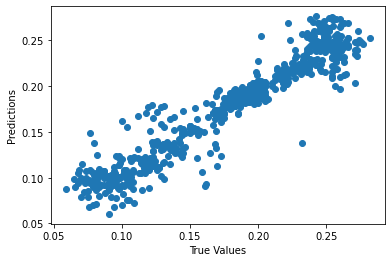

In [29]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [30]:
%store model_fl_x

Stored 'model_fl_x' (LinearRegression)


In [116]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [132]:
# Save model
joblib.dump(model_fl_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/model_fl_x.sav")

['/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/model_fl_x.sav']

### Predict FR foot -> y

In [125]:
# Stack motion command, velocity state, 
# and foot x coordinate. The last row
# is not considered
X = np.hstack((X_motions_3D[:, :3], np.array([X_motions_3D[:, 5]]).T, np.array([X_motions_3D[:, 7]]).T, np.array([X_motions_3D[:, 10]]).T))

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions_3D[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size=0.2, shuffle=True)

# Create the model
model_fl_y = LinearRegression()

# Fit the model
model_fl_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_y.predict(X_test)

# Stats
print("Model score: ", model_fl_y.score(X_test, Y_test))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mean_squared_error(Y_test, predictions))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

Model score:  0.9622915262048478
The lowest error is:  2.3790514642740845e-06
The highest error is:  0.0798660523729875
The avg. error is:  0.003557862912915626
The mean squared avg. error between the prediction and groundtruth is:  2.7394856432466912e-05


Text(0, 0.5, 'Predictions')

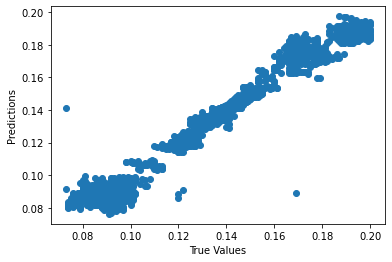

In [126]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [127]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [131]:
# Save model
joblib.dump(model_fl_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/model_fl_y.sav")

['/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/model_fl_y.sav']